In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

import numpy as np

sample_rate = 48000
tau = 2.0 * np.pi

Populating the interactive namespace from numpy and matplotlib


In [52]:
def polyblep_2sample(phase, phase_step):
    if phase =< phase_step:
        t = phase / phase_step
        blep = (2 * t) - (t * t) - 1.0
        print("blep!\nphase: %s\nphase-step: %s\nblep: %s" % (phase, phase_step, blep))
        return blep
    
    if phase >= (1.0 - phase_step):
        t = (phase - 1.0) / phase_step
        blep = (t * t) + (2 * t) + 1.0
        print("blep!\nphase: %s\nphase-step: %s\nblep: %s" % (phase, phase_step, blep))
        return blep
    
    return 0.0

def blep_saw(osc_freq, num_samples, sample_rate):
    out = []
    phase_step = float(osc_freq) / sample_rate
    print("step: %s" % phase_step)
    last_phase = 0.0
    curr_phase = 0.0
    
    for i in range(0, num_samples):
        out_val = (1.0 - (2.0 * curr_phase)) + polyblep_2sample(curr_phase, phase_step)
        out.append(out_val)
        last_phase = curr_phase
        curr_phase += phase_step
        if curr_phase > 1.0:
            curr_phase = 0.0
    return np.array(out)

SyntaxError: invalid syntax (<ipython-input-52-7c62f727ec31>, line 2)

step: 0.00916666666667
blep!
phase: 0.0
phase-step: 0.00916666666667
blep: -1.0
blep!
phase: 0.999166666667
phase-step: 0.00916666666667
blep: 0.826446280992
blep!
phase: 0.0
phase-step: 0.00916666666667
blep: -1.0
blep!
phase: 0.999166666667
phase-step: 0.00916666666667
blep: 0.826446280992
blep!
phase: 0.0
phase-step: 0.00916666666667
blep: -1.0


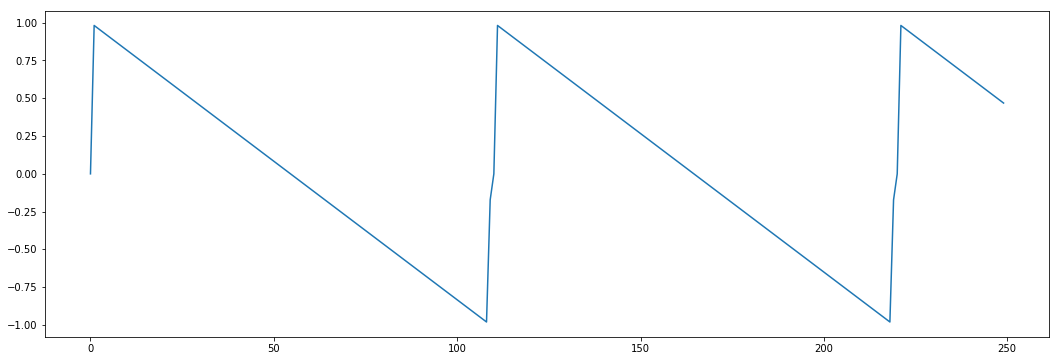

In [51]:
plot(blep_saw(440, 250, sample_rate))